# INTRODUCTION
The sinking of the Titanic is one of the most notorious shipwreck in the history. In 1992, durinh her voyage, the titanic sank after colliding with a huge iceberg, killing 1502 out of 2224 passangers and crew. 


<font color = "red">
Content:
    
1. [Load And Check Data](#1)
1. [Variable Description](#2)
   * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)       
1.  [Basic Data Analysis](#6)  
1.  [Outlier Detection](#7)
1.  [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)     
1.  [Visualization](#11)
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing: Age Feature](#20)
1.  [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)  
1.  [Modeling](#29)
    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32)
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
plt.style.use("seaborn-whitegrid")
#plt.style.available
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id= "1"></a>
### Load And Check Data

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test_passengerID = test["PassengerId"]





In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id= "2"></a>
# Variable Description

1. PassengerId : Unique Id number to each Passengers
2. Survived : Survive(1) Died (0)
3. Pclass : Passengers Class: 1-2-3
4. Name : Name
5. Sex: Gender
6. Age : 
7. SibSp :Number of Siblings/Spouses
8. Parch : Number Of Parents/Children
9. Ticket : Ticket Number
10. Fare : Amount of Money for Ticket
11. Cabin : Cabin Category
12. Embarked : Port Where Passenger Embarked (C = Cherbourg, Q= Queenstown, S= Southampton)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id= "3"></a>
# Univariate Variable Analysis
 * Categorical Variable : Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket
 * Numerical Variable : Age, PassengerId, Fare

<a id= "4"></a>
## Categorical Variable:

In [7]:
def bar(x):
    var = train[x]
    varValue= var.value_counts()
    
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(x)
    plt.show()
    print(f"{x}: \n {varValue}")

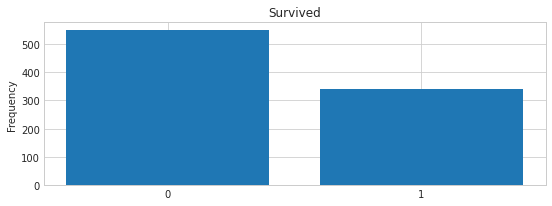

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


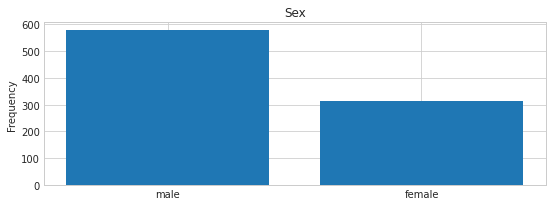

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


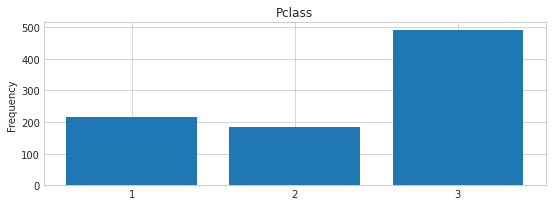

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


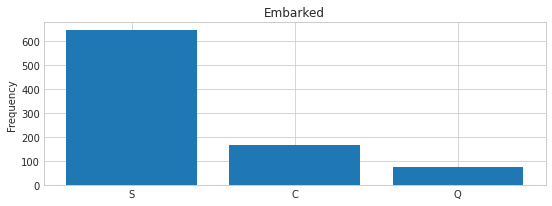

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


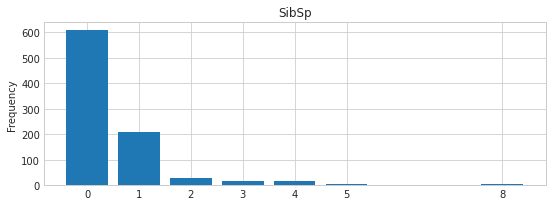

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


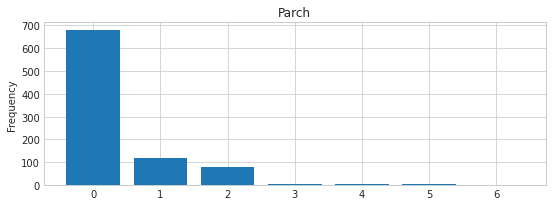

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
category= ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for i in category:
    bar(i)

In [9]:
category1 = ["Cabin", "Name","Ticket"] 
for v in category1:
    print(f"{train[v].value_counts()}")

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


<a id= "5"></a>
## Numerical Variable:

In [10]:
def hist(x):
    plt.figure(figsize=(9,3))
    plt.hist(train[x], bins=50)
    plt.xlabel(x)
    plt.ylabel("Frequency")
    plt.title(f"{x}")
    plt.show()

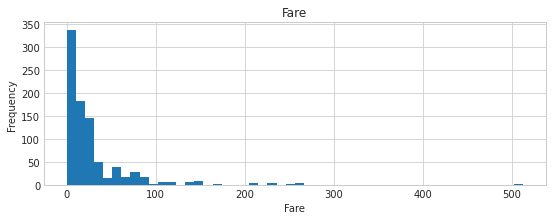

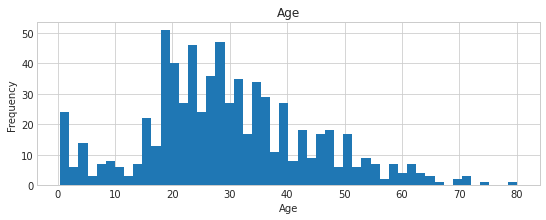

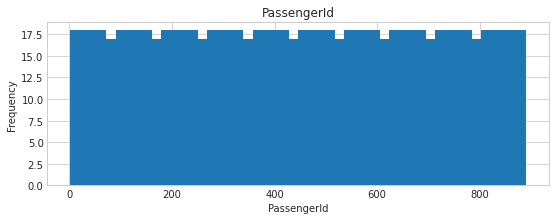

In [11]:
numeric = ["Fare","Age","PassengerId"]
for n in numeric:
    hist(n)

<a id= "6"></a>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived



### Pclass - Survived

In [12]:
train[["Pclass","Survived"]].groupby(["Pclass"], as_index= False).mean().sort_values(by="Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363



### Sex- Survived

In [13]:
train[["Sex","Survived"]].groupby(["Sex"], as_index= False).mean().sort_values(by="Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Sibsp- Survived

In [14]:
train[["SibSp","Survived"]].groupby(["SibSp"], as_index= False).mean().sort_values(by="Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Parch- Survived

In [15]:
train[["Parch","Survived"]].groupby(["Parch"], as_index= False).mean().sort_values(by="Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id= "7"></a>
# Outlier Detection

In [16]:
def outliers(df,features):
    ind = []
    for c in features: 
        # 1st Quartile
        Q1 = np.percentile(df[c],25)

        # 3rd Quartile
        Q3 = np.percentile(df[c],75)

        # IQR
        IQR = Q3 - Q1

        # Outlier steps
        steps= IQR*1.5

        # Detect Outliers And Their Indeces
        list_col = df[(df[c]<Q1 - steps) | (df[c]>Q3 + steps)].index

        # Store Indeces
        ind.extend(list_col)

    ind = Counter(ind)
    
    multiple_outliers = list(i for i, v in ind.items() if v > 2)        
    return multiple_outliers


  

In [17]:
train.loc[outliers(train,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [18]:
### Drop Outliers

train = train.drop(outliers(train,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id= "8"></a>
# Missing Value
* Find Missing Value
* Fill Missing Value

<a id= "9"></a>
## Find Missing Value

In [19]:
train_len = len(train)
train = pd.concat([train,test],axis=0).reset_index(drop=True)

In [20]:
train.columns[train.isnull().any()]


Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [21]:
train.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id= "10"></a>
## Fill Missing Value

* Embark has 2 missing value.
* Fare has merely 1 missing value.


### For Embark

In [22]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


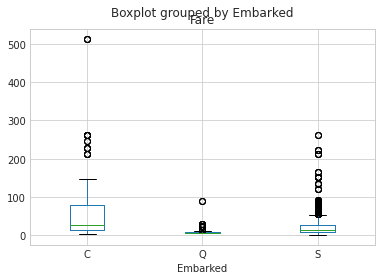

In [23]:
train.boxplot(column="Fare",by="Embarked")
plt.show()

In [24]:
train["Embarked"] = train["Embarked"].fillna("C")

### For Fare

In [25]:
train[train["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [26]:
train["Fare"]=train["Fare"].fillna(np.mean(train[train["Pclass"]==3]["Fare"]))

In [27]:
train[train["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id= "11"></a>
# Visualization

<a id= "12"></a>
### Correlation Between SibSp -- Age -- Fare -- Survived

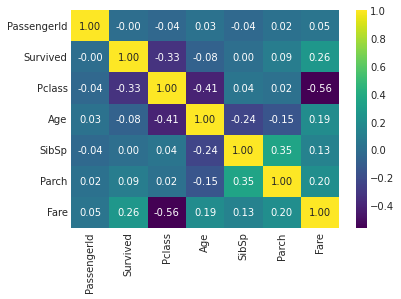

In [28]:
sns.set_palette("RdBu")
sns.heatmap(train.corr(),annot= True, fmt = ".2f",cmap="viridis")
plt.show()

<a id= "13"></a>
### SibSp -- Survived

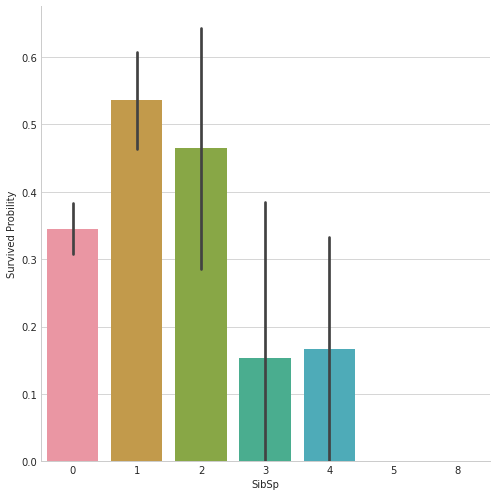

In [29]:
g = sns.factorplot(x="SibSp",y="Survived",data=train, kind="bar",size=7)
g.set_ylabels("Survived Probility")
plt.show()

Notes:
1. Having 2 and less, have more chance to survived.
2. We can consider a new features describing these categories.

<a id= "14"></a>
### Parch -- Survived

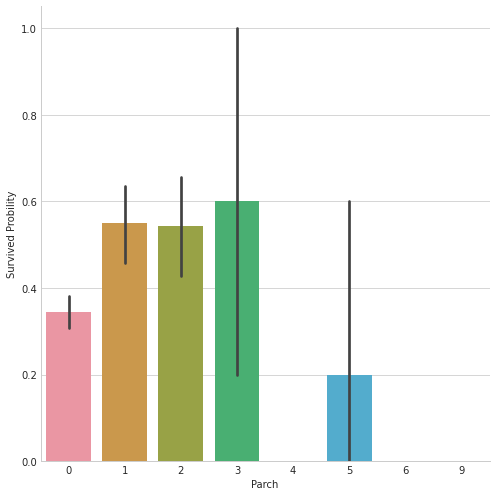

In [30]:
g = sns.factorplot(x="Parch",y="Survived",data=train, kind="bar",size=7)
g.set_ylabels("Survived Probility")
plt.show()

Notes:
1. SibSp and Parch can be used for new features extraction with treshold = 3.

<a id= "15"></a>
### Pclass -- Survived

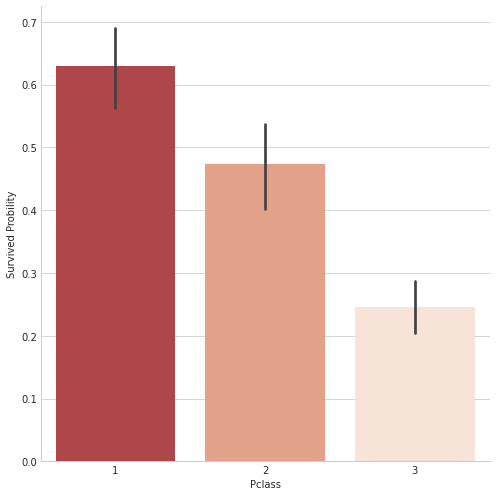

In [31]:
g = sns.factorplot(x="Pclass",y="Survived",data=train, kind="bar",size=7)
g.set_ylabels("Survived Probility")
plt.show()

<a id= "16"></a>
### Age -- Survived

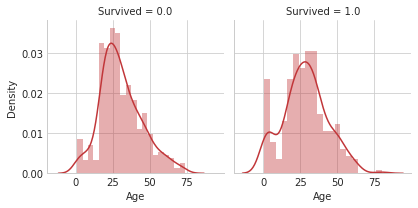

In [32]:
a = sns.FacetGrid(train, col= "Survived")
a.map(sns.distplot, "Age", bins=20)
plt.show()

Notes:
1. Age <= 10 has high survival rate
2. Large Number of 20 years old passengers did not survive
3. We can use age feature in traing.
4. We can use age distribution to fill missing values for Age Column.

<a id= "17"></a>
### Pclass -- Survived -- Age

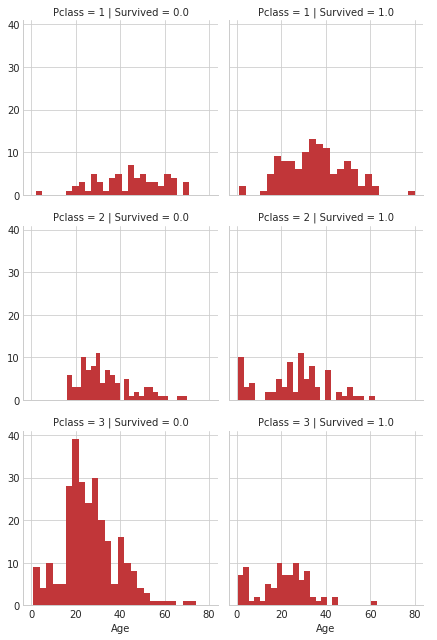

In [33]:
g = sns.FacetGrid(train, col = "Survived", row="Pclass")
g.map(plt.hist, "Age", bins=25)
g.add_legend()
plt.show()

Note:
1. Pclass is important feature for model traing.

<a id= "18"></a>
### Pclass -- Survived -- Sex -- Embarked

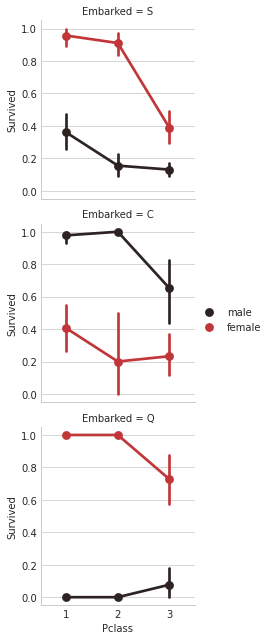

In [34]:
g = sns.FacetGrid(train, row="Embarked")
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

Notes:
1. Females have much better survival than Males.
2. Males have better survival rate in Class in C.
3. Embarked and sex would be used in training.

<a id= "19"></a>
### Fare -- Survived -- Sex -- Embarked

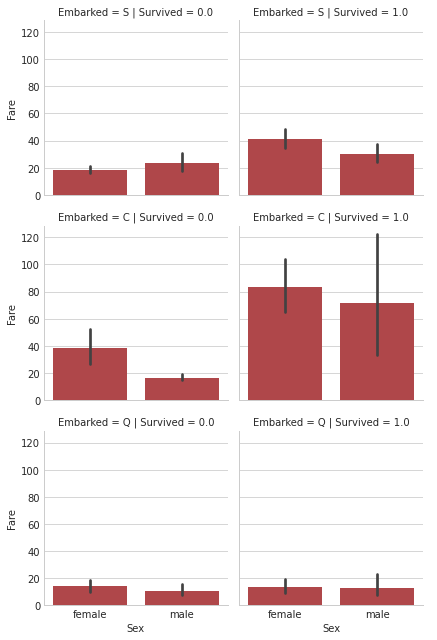

In [35]:
g = sns.FacetGrid(train, row="Embarked", col = "Survived")
g.map(sns.barplot, "Sex","Fare")
g.add_legend()
plt.show()

Notes:
1. Passenger who paid higher fare, having better survival.
2. Fare can be used as categorical for training.

<a id= "20"></a>
# Fill Missing Value : Age Feature

In [36]:
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


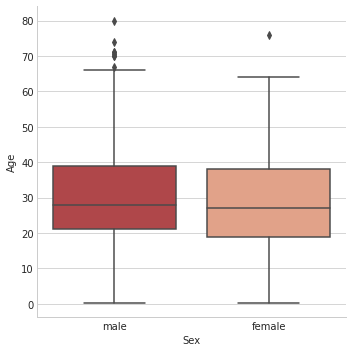

In [37]:
sns.factorplot(x="Sex", y="Age",data=train, kind="box")
plt.show()

Sex is not informative for age prediction, age distribution seems to be same.

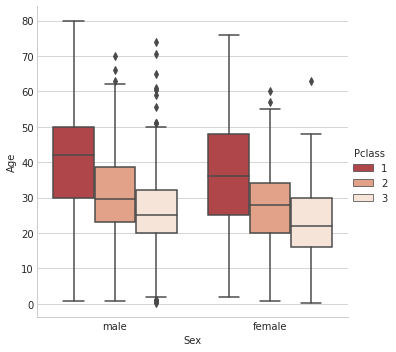

In [38]:
sns.factorplot(x="Sex", y="Age",hue="Pclass", data=train, kind="box")
plt.show()

Olderness is respectively 1 class, 2 class and 3 class.

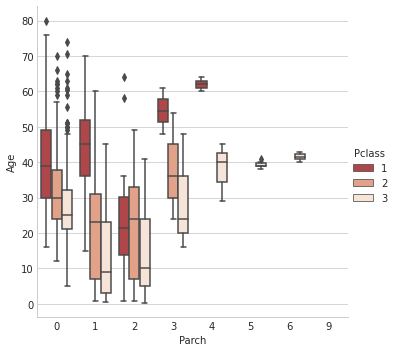

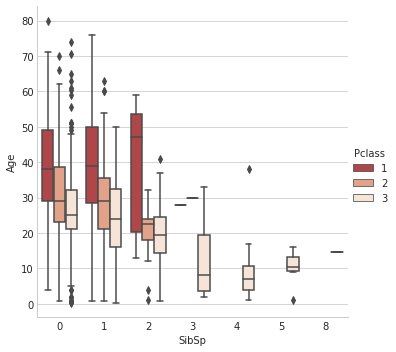

In [39]:
sns.factorplot(x="Parch", y="Age",hue="Pclass", data=train, kind="box")
sns.factorplot(x="SibSp", y="Age",hue="Pclass", data=train, kind="box")
plt.show()

In [40]:
train["Sex"] = [1 if i=="male" else 0 for i in train["Sex"]]
train["Sex"]



0       1
1       0
2       0
3       0
4       1
       ..
1294    1
1295    0
1296    1
1297    1
1298    1
Name: Sex, Length: 1299, dtype: int64

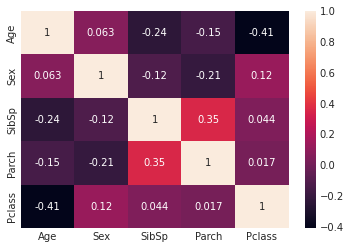

In [41]:
sns.heatmap(train[["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot=True)
plt.show()

Age is correlated with all features apart from Sex.

In [42]:
index_nan_age =list(train["Age"][train["Age"].isnull()].index)
for i in index_nan_age:
    age_fill = train["Age"][((train["SibSp"]==train.iloc[i]["SibSp"])&(train["Parch"]==train.iloc[i]["Parch"])&(train["Pclass"]==train.iloc[i]["Pclass"]))].median()
    age_med = train["Age"].median()
    if not np.isnan(age_fill):
        train["Age"].iloc[i] = age_fill
    else:
        train["Age"].iloc[i] = age_med

In [43]:
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id= "21"></a>
# Feature Engineering

<a id= "22"></a>
## Name-- Title

In [44]:
train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [45]:
s="Onur, Mr.Tekerekoglu"
s.split(".")[0].split(",")[-1].strip()

'Mr'

In [46]:
name= train["Name"]
train["Title"]=[i.split(".")[0].split(",")[-1] for i in name]

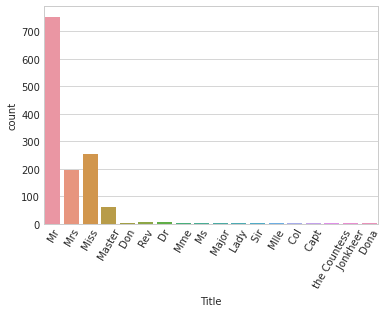

In [47]:
sns.countplot(x="Title", data = train)
plt.xticks(rotation=60)
plt.show()

In [48]:
Title = list(train["Title"])
type(Title)


list

In [49]:
##train["Title"] = train["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")

for i in range(len(Title)):
    
    if Title[i] == " Lady":
     Title[i]="Other"
        
    elif Title[i] == " the Countess":
     Title[i]="Other"

    elif Title[i] == " Capt":
     Title[i]= "Other"

    elif Title[i] == " Col":
     Title[i]="Other"

    elif Title[i] == " Don":
     Title[i]="Other"

    elif Title[i] == " Dr":
     Title[i]="Other"

    elif Title[i] == " Major":
     Title[i]="Other"

    elif Title[i] == " Rev":
     Title[i]="Other"

    elif Title[i] == " Sir":
     Title[i]="Other"

    elif Title[i] == " Jonkheer":
     Title[i]= "Other"
    
    elif Title[i] == " Dona":
     Title[i]="Other"
    else:
     Title[i]=Title[i]




In [50]:
New_Titles=pd.DataFrame(Title, columns =["New_Titles"])

In [51]:
New_Titles

,New_Titles
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
1294,Mr
1295,Other
1296,Mr
1297,Mr


In [52]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
New_Titles = ohe.fit_transform(New_Titles).toarray()
print(New_Titles)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [53]:
type(New_Titles)

numpy.ndarray

In [54]:
ohe.categories_

[array([' Master', ' Miss', ' Mlle', ' Mme', ' Mr', ' Mrs', ' Ms', 'Other'],
       dtype=object)]

In [55]:
columns_labels = ohe.categories_
np.array(columns_labels).ravel()

array([' Master', ' Miss', ' Mlle', ' Mme', ' Mr', ' Mrs', ' Ms', 'Other'],
      dtype=object)

In [56]:
columns_labels = np.array(columns_labels).ravel()
print(columns_labels)

[' Master' ' Miss' ' Mlle' ' Mme' ' Mr' ' Mrs' ' Ms' 'Other']


In [57]:
df_Titles = pd.DataFrame(data=New_Titles, columns = columns_labels)
print(df_Titles)

       Master   Miss   Mlle   Mme   Mr   Mrs   Ms  Other
0         0.0    0.0    0.0   0.0  1.0   0.0  0.0    0.0
1         0.0    0.0    0.0   0.0  0.0   1.0  0.0    0.0
2         0.0    1.0    0.0   0.0  0.0   0.0  0.0    0.0
3         0.0    0.0    0.0   0.0  0.0   1.0  0.0    0.0
4         0.0    0.0    0.0   0.0  1.0   0.0  0.0    0.0
...       ...    ...    ...   ...  ...   ...  ...    ...
1294      0.0    0.0    0.0   0.0  1.0   0.0  0.0    0.0
1295      0.0    0.0    0.0   0.0  0.0   0.0  0.0    1.0
1296      0.0    0.0    0.0   0.0  1.0   0.0  0.0    0.0
1297      0.0    0.0    0.0   0.0  1.0   0.0  0.0    0.0
1298      1.0    0.0    0.0   0.0  0.0   0.0  0.0    0.0

[1299 rows x 8 columns]


In [58]:
train= pd.concat([train,df_Titles],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Other
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,S,Mr,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,C,Mrs,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,S,Mrs,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,S,Mr,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [59]:
train.drop(columns=["Name","Title"],inplace=True)
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Other
1294,1305,NaN,3,1,25.0,0,0,A.5. 3236,8.0500,NaN,S,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1295,1306,NaN,1,0,39.0,0,0,PC 17758,108.9000,C105,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1296,1307,NaN,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1297,1308,NaN,3,1,25.0,0,0,359309,8.0500,NaN,S,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1298,1309,NaN,3,1,16.0,1,1,2668,22.3583,NaN,C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id= "23"></a>
## Family Size

In [60]:
train["Fsize"] = train["SibSp"]+train["Parch"]+1

In [61]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Other,Fsize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


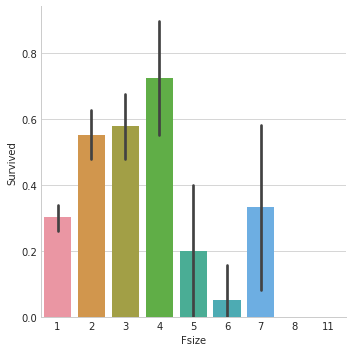

In [62]:
g = sns.factorplot(x="Fsize",y="Survived",data=train,kind="bar")
g.set_xlabels("Fsize")
g.set_ylabels("Survived")
plt.show()

In [63]:
train["Familysize"]=[1 if i<5 else 0 for i in train["Fsize"]]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Other,Fsize,Familysize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1


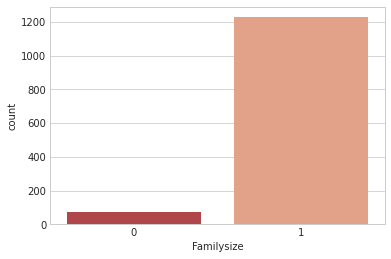

In [64]:
g = sns.countplot(x="Familysize",data=train)
plt.show()

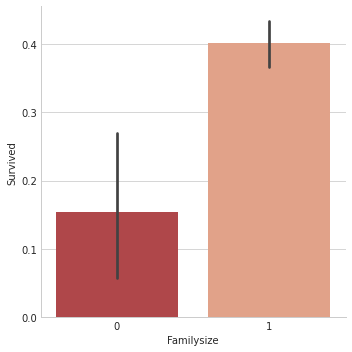

In [65]:
g = sns.factorplot(x="Familysize",y="Survived",data=train,kind="bar")
g.set_xlabels("Familysize")
g.set_ylabels("Survived")
plt.show()

Notes:
1. Small faimilies have more chance to survive than large families.

In [66]:
train= pd.get_dummies(train,columns=["Familysize"])

In [67]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Miss,Mlle,Mme,Mr,Mrs,Ms,Other,Fsize,Familysize_0,Familysize_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0,1


In [68]:
train.drop(columns=["Fsize"],inplace=True)

<a id= "24"></a>
## Embarked

In [69]:
train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [70]:
train["Embarked"].value_counts()

S    904
C    272
Q    123
Name: Embarked, dtype: int64

In [71]:
#train["Embarked"] = [2 if i=='S' else 1 if i=='C' else 0 for i in train["Embarked"]]
#train["Embarked"].unique()

In [72]:
Embarked_array = ohe.fit_transform(train[["Embarked"]]).toarray()
print(Embarked_array)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [73]:
ohe.categories_


[array(['C', 'Q', 'S'], dtype=object)]

In [74]:
columns_labels1 = ohe.categories_


In [75]:
New_embaked= np.array(columns_labels1).ravel()

In [76]:
df_Titles1 = pd.DataFrame(data=Embarked_array, columns = columns_labels1)
print(df_Titles1)

        C    Q    S
0     0.0  0.0  1.0
1     1.0  0.0  0.0
2     0.0  0.0  1.0
3     0.0  0.0  1.0
4     0.0  0.0  1.0
...   ...  ...  ...
1294  0.0  0.0  1.0
1295  1.0  0.0  0.0
1296  0.0  0.0  1.0
1297  0.0  0.0  1.0
1298  1.0  0.0  0.0

[1299 rows x 3 columns]


In [77]:
train= pd.concat([train,df_Titles1],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Mme,Mr,Mrs,Ms,Other,Familysize_0,Familysize_1,"(C,)","(Q,)","(S,)"
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,...,0.0,1.0,0.0,0.0,0.0,0,1,0.0,0.0,1.0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,...,0.0,0.0,1.0,0.0,0.0,0,1,1.0,0.0,0.0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,1.0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,...,0.0,0.0,1.0,0.0,0.0,0,1,0.0,0.0,1.0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,...,0.0,1.0,0.0,0.0,0.0,0,1,0.0,0.0,1.0


In [78]:
train.drop(columns=["Embarked"],inplace=True)

<a id= "25"></a>
## Ticket

In [79]:
train["Ticket"].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [80]:
a =  "A/5 21171"
a.replace("."," ").replace("/","").strip().split(" ")[0]

'A5'

In [81]:
ticket= []
for i in list(train.Ticket):
    if not i.isdigit():
        ticket.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        ticket.append("X")
train["Ticket"]= ticket

In [82]:
train["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          X
4          X
5          X
6          X
7          X
8          X
9          X
10        PP
11         X
12        A5
13         X
14         X
15         X
16         X
17         X
18         X
19         X
Name: Ticket, dtype: object

In [83]:
ticket_array = ohe.fit_transform(train[["Ticket"]]).toarray()
print(ticket_array)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [84]:
columns_labels2 = ohe.categories_

In [85]:
New_Ticket= np.array(columns_labels2).ravel()

In [86]:
df_Titles2 = pd.DataFrame(data=ticket_array, columns = columns_labels2)
print(df_Titles2)

        A   A4   A5  AQ3  AQ4   AS    C   CA CASOTON   FC  ... SOTONO2  \
0     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  ...     0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  ...     0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  ...     0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  ...     0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  ...     0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...     ...  ...  ...     ...   
1294  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  ...     0.0   
1295  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  ...     0.0   
1296  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  ...     0.0   
1297  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  ...     0.0   
1298  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  ...     0.0   

     SOTONOQ   SP STONO STONO2 STONOQ SWPP   WC  WEP    X  
0        0.0  0.0   0.0    0.0    0.0  0.0  0.0  0.

In [87]:
train= pd.concat([train,df_Titles2],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,"(SOTONO2,)","(SOTONOQ,)","(SP,)","(STONO,)","(STONO2,)","(STONOQ,)","(SWPP,)","(WC,)","(WEP,)","(X,)"
0,1,0.0,3,1,22.0,1,0,A5,7.2500,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,1,0,38.0,1,0,PC,71.2833,C85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,3,0,26.0,0,0,STONO2,7.9250,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1,0,35.0,1,0,X,53.1000,C123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0.0,3,1,35.0,0,0,X,8.0500,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [88]:
#train= pd.get_dummies(train, columns=["Ticket"],prefix= "T")
#train.head()

In [89]:
train.drop(columns=["Ticket"],inplace=True)

<a id= "26"></a>
## Pclass 

In [90]:
train["Pclass"].head(10)

0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: Pclass, dtype: int64

In [91]:
Pclass_array = ohe.fit_transform(train[["Pclass"]]).toarray()
print(Pclass_array)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [92]:
columns_labels3 = ohe.categories_

In [93]:
New_Pclass= np.array(columns_labels3).ravel()

In [94]:
df_Titles3 = pd.DataFrame(data=Pclass_array, columns = columns_labels3)
print(df_Titles3)

        1    2    3
0     0.0  0.0  1.0
1     1.0  0.0  0.0
2     0.0  0.0  1.0
3     1.0  0.0  0.0
4     0.0  0.0  1.0
...   ...  ...  ...
1294  0.0  0.0  1.0
1295  1.0  0.0  0.0
1296  0.0  0.0  1.0
1297  0.0  0.0  1.0
1298  0.0  0.0  1.0

[1299 rows x 3 columns]


In [95]:
train= pd.concat([train,df_Titles3],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Master,...,"(STONO,)","(STONO2,)","(STONOQ,)","(SWPP,)","(WC,)","(WEP,)","(X,)","(1,)","(2,)","(3,)"
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


<a id= "27"></a>
## Sex

In [96]:
train["Sex"].head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Sex, dtype: int64

In [97]:
Sex_array = ohe.fit_transform(train[["Sex"]]).toarray()
print(Sex_array)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [98]:
columns_labels4 = ohe.categories_

In [99]:
New_Sex= np.array(columns_labels4).ravel()

In [100]:
df_Titles4 = pd.DataFrame(data=Sex_array, columns = columns_labels4)
print(df_Titles4)

        0    1
0     0.0  1.0
1     1.0  0.0
2     1.0  0.0
3     1.0  0.0
4     0.0  1.0
...   ...  ...
1294  0.0  1.0
1295  1.0  0.0
1296  0.0  1.0
1297  0.0  1.0
1298  0.0  1.0

[1299 rows x 2 columns]


In [101]:
train= pd.concat([train,df_Titles4],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Master,...,"(STONOQ,)","(SWPP,)","(WC,)","(WEP,)","(X,)","(1,)","(2,)","(3,)","(0,)","(1,)"
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


<a id= "28"></a>
## Drop Passenger Id and Cabin No

In [102]:
train.drop(labels=["PassengerId","Cabin"],axis=1,inplace= True)

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      881 non-null    float64
 1   Pclass        1299 non-null   int64  
 2   Sex           1299 non-null   int64  
 3   Age           1299 non-null   float64
 4   SibSp         1299 non-null   int64  
 5   Parch         1299 non-null   int64  
 6   Fare          1299 non-null   float64
 7    Master       1299 non-null   float64
 8    Miss         1299 non-null   float64
 9    Mlle         1299 non-null   float64
 10   Mme          1299 non-null   float64
 11   Mr           1299 non-null   float64
 12   Mrs          1299 non-null   float64
 13   Ms           1299 non-null   float64
 14  Other         1299 non-null   float64
 15  Familysize_0  1299 non-null   uint8  
 16  Familysize_1  1299 non-null   uint8  
 17  (C,)          1299 non-null   float64
 18  (Q,)          1299 non-null 

<a id= "29"></a>
# Modeling

In [104]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id= "30"></a>
## Train-Test Split

In [105]:
train_len

881

In [106]:
test = train[train_len:]
test.drop(labels=["Survived"],axis=1,inplace=True)

In [107]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Master,Miss,Mlle,Mme,...,"(STONOQ,)","(SWPP,)","(WC,)","(WEP,)","(X,)","(1,)","(2,)","(3,)","(0,)","(1,)"
881,3,1,34.5,0,0,7.8292,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
882,3,0,47.0,1,0,7.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
883,2,1,62.0,0,0,9.6875,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
884,3,1,27.0,0,0,8.6625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
885,3,0,22.0,1,1,12.2875,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [108]:
train= train[:train_len]
X_train = train.drop(labels= "Survived", axis = 1)
Y_train = train["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size= 0.33, random_state=42)

In [109]:
print("X test:",len(X_test))
print("X train:",len(X_train))
print("Y test:",len(Y_test))
print("Y train:",len(Y_train))
print("Test:",len(test))


X test: 291
X train: 590
Y test: 291
Y train: 590
Test: 418


<a id= "31"></a>
## Simple Logistic Regresion

In [110]:
Logreg = LogisticRegression()
Logreg.fit(X_train, Y_train)
acc_log_train= round(Logreg.score(X_train,Y_train)*100,2)
acc_log_test= round(Logreg.score(X_test,Y_test)*100,2)
print(f"Training Accuracy:{acc_log_train}")
print(f"Testing Accuracy:{acc_log_test}")

Training Accuracy:83.05
Testing Accuracy:81.79


<a id= "32"></a>
## Hyperparameter Tuning -- Grid Search-- Cross Validation

We will compare 5 different ml classifiers and eveluate mean accuracy of each of them by stratified cross validation.
* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [111]:
rs= 42
classifier = [ DecisionTreeClassifier(random_state=rs),
             SVC(random_state=rs),
             RandomForestClassifier(random_state=rs),
             LogisticRegression(random_state=rs),
             KNeighborsClassifier()]

In [112]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [113]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,Y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])


Fitting 10 folds for each of 250 candidates, totalling 2500 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packag

0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packag

0.8
Fitting 10 folds for each of 54 candidates, totalling 540 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packag

0.8423728813559321
Fitting 10 folds for each of 14 candidates, totalling 140 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packag

0.8169491525423729
Fitting 10 folds for each of 40 candidates, totalling 400 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  Future

0.7847457627118644


Text(0.5, 1.0, 'Cross Validation Scores')

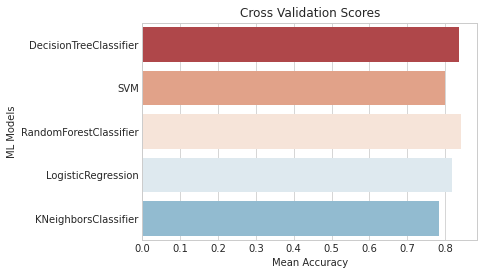

In [114]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a id= "33"></a>
## Ensemble Modeling

In [115]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, Y_train)
print(accuracy_score(votingC.predict(X_test),Y_test))

0.8178694158075601


In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(votingC.predict(X_test),Y_test)

array([[154,  31],
       [ 22,  84]])

In [117]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,votingC.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       176
         1.0       0.79      0.73      0.76       115

    accuracy                           0.82       291
   macro avg       0.81      0.80      0.81       291
weighted avg       0.82      0.82      0.82       291



<a id= "34"></a>
## Prediction and Submission

In [118]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
